# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solution to Assignment 3 posted on JupyterHub and Canvas
 - Assignment 4 due Sunday, November 1 at midnight
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)

## Week 5

 - Art of Electronics (AoE) Chapters 4, 5
 - Microelectronics (Sedra/Smith) Chapter 2

## Overview

- Last time...
    - Ideal opamp
    - Opamp characteristics
    - Opamp frequency response
    - Feedback
    - Offset
    - Input bias current
- Today...
    - Sources of error
    - Differential signaling
    - Difference amplifier
    - Instrumentation amplifier


## Python packages/modules

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])

# Lecture 5 - Precision Design

## Precision design goals

- There is often a need for high precision circuits in measurement and control applications
- Circuits should be accurate, stable with time and temperature, and predictable
- Numerous sources of error make these goals challenging (noisy power supplies, thermal noise, nonlinearity, amplifier errors, to name a few)
- Precision analog design is all about using the right combination of components and circuit architectures to achieve strict performance goals in the face of device limitations and variability


## Error budget

- It’s important to understand how individual sources of error affect performance for a given application
- All error sources should be accounted for to understand potential problem areas and how the design might be improved
- It is good practice to refer all errors to the input of a system to be able to clearly quantify their net effect and make direct comparisons
- Once this “error budget” is created, rational decisions can be made regarding component selection and (inevitable) performance tradeoffs

## Sources of error

 - *Initial accuracy*
    - Component manufacturing tolerance - specified as a percentage (e.g. 1%, 0.1%)
 - *Stability*
    - Component value drift over time - specified in $ppm/$(large unit of time)
 - *Temperature*
    - Component value drift with temperature - specified in $ppm/^\circ C$
 - *Gain and settling errors*
    - Errors due to loading, finite opamp gain, incomplete settling (controllable by design)
 - *Nonlinearity*
    - Voltage dependence of component values (e.g. gain) - typically specified as a percentage


## Opamp errors

 - Input offset voltage and bias current
    - Input bias current errors depend source resistance
    - Offset may not be a concern for applications that don't require DC accuracy
 - Finite power supply rejection (PSRR)
    - Typically fairly high, and may not be a concern with a well-designed power supply
 - Finite common-mode rejection (CMRR)
    - Ability of an amplifier to suppress common-mode “noise”
 - Finite gain, input/output impedance, bandwidth, and slew rate (SR)
 - Voltage and current noise
    - Johnson and flicker noise

## Input offset voltage error

 - Opamp can’t distinguish between its own offset and a “real” input
 - As a result, $v_{os}$ is amplified along with the sensor voltage
 - For signals at DC, special techniques (e.g. auto-zeroing) may be required to achieve the required precision
 - Tradeoffs exists, as such techniques tend to increase noise and affect amplifier input impedance 

<center><img src="img/non_inverting_signal_plus_offset.png" width=500 /></center>

$$ V_{out} = \left(1 + \dfrac{R_2}{R_1}\right)(V_s + v_{os})$$ 

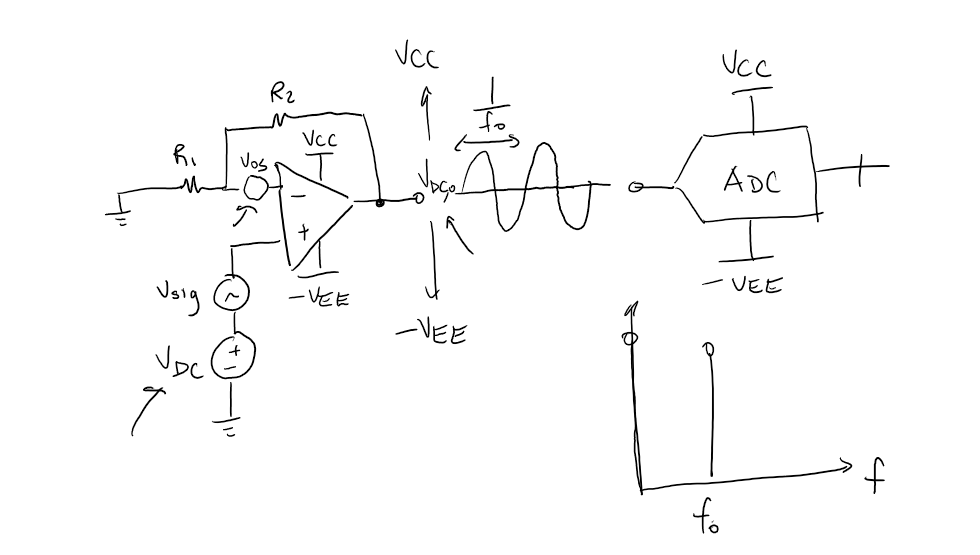

## Input bias current error

<center><img src="img/non_inverting_input_bias_current.png" width=500 /></center>

Example values:

$$I_B = 1nA \:\:\: R_S = 1k\Omega $$

$$ V_{err,input} = I_B R_S = 1\mu V $$

 - Nanoampere current levels produce voltage errors of microvolts or greater for source impedances as small as $1k\Omega$
 - FET-based opamps perform better, but at the expense of increased voltage offset and noise
 - Input current for FET’s is actually gate leakage, which rises dramatically with temperature (in contrast to BJT base current)

## Loading effects

<center><img src="img/inverting_amplifier.png" width=500 /></center>

$$R_{in,CL} \approx R_i $$

<center><img src="img/non_inverting_amplifier.png" width=500 /></center>

$$ R_{in,CL} \rightarrow \infty $$

 - Aside from closed-loop gain (and bandwidth), the salient difference between the inverting and non-inverting stages is their input resistance
 - With an opamp with high open-loop input impedance and gain, the closed-loop input resistance for a non-inverting stage can easily be 100's of $M\Omega$ or higher
 - The input resistance of the inverting amplifier, on the other hand, is limited by the value of $R_i$
 - To realize gain, $R_i$ must be smaller than $R_f$, often leading to input resistance that would result in significant attenuation for sensors with high output resistance

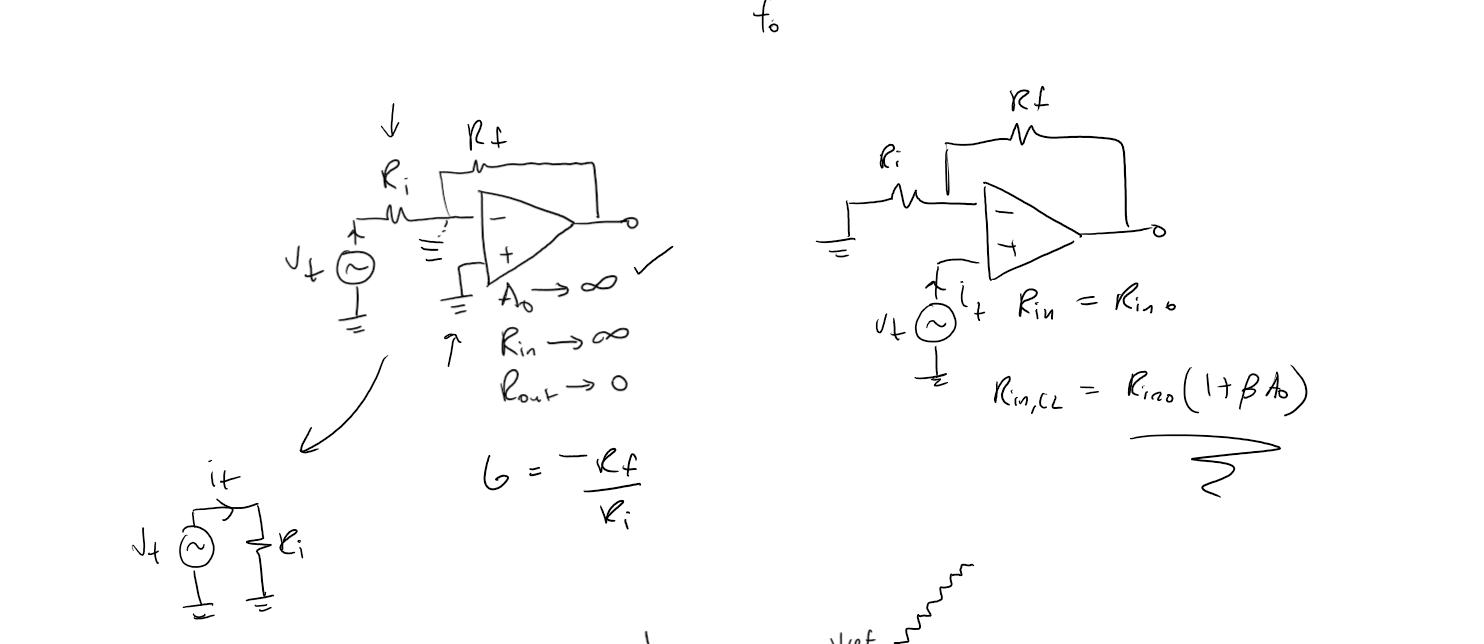

## Gain error (DC)

 - The primary goal of feedback is to desensitize certain parameters like gain, input impedance, and output impedance to open-loop characteristics 
 - In the case of opamp circuits, the ideal condition is *infinite* open-loop gain, which produces ideal *closed-loop* characteristics, such as
 
 $$ R_{in,ideal} \rightarrow \infty $$
 
 $$ R_{out,ideal} = 0 $$
 
 $$ G_{ideal} = \dfrac{1}{\beta} $$
 
 - In the case of DC gain, the error is defined as the difference between the ideal value and the actual gain:
 
 $$ \delta_G = \dfrac{1}{\beta} - \dfrac{A_0}{1+\beta A_0}$$
 
 - This error is reduced as $A_0$ becomes larger (and becomes zero for $A_0 \rightarrow \infty$)

## Gain error (frequency-dependent)

 - Closed-loop gain is also a function of frequency, due to the finite bandwidth of the opamp
 
$$ G(j\omega) = \dfrac{A_v(s)}{1+\beta A_v(s)} =  \dfrac{A_0}{1+s/\omega_0+\beta A_0} = \dfrac{A_0/(1+\beta A_0)}{1+\dfrac{s}{\omega_0 (1+\beta A_0)}} $$

 - The magnitude of the closed-loop gain thus depends on frequency
 
$$ |G(j\omega)| =  \dfrac{A_0/(1+\beta A_0)}{\sqrt{(1 + \dfrac{\omega^2}{\omega_0^2 (1+\beta A_0)^2}}} \approx \dfrac{A_0/(1+\beta A_0)}{\sqrt{1 + \dfrac{\omega^2}{\beta^2 \omega_t^2}}} $$

 - We thus expect the gain error ($|G(j\omega)| - 1/\beta$) to *increase* with frequency, due to the decrease in open-loop gain at higher frequencies (determined by $\omega_t$)
 

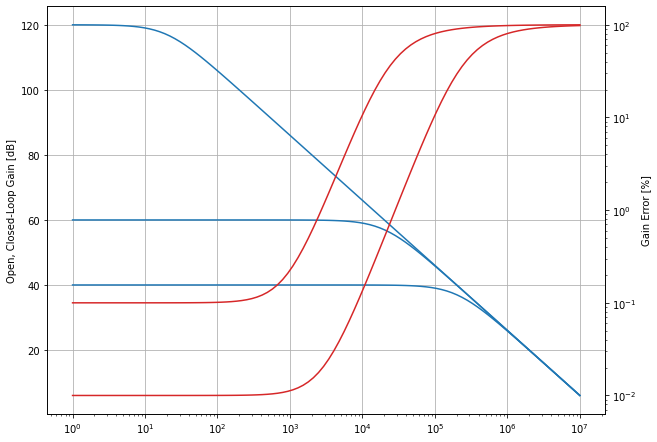

In [7]:
A_dc = 1e6
f_T = 20e6
tau = 1/(2*np.pi*f_T/A_dc)
Av_ol = signal.TransferFunction([A_dc], [tau, 1])
w = 2*np.pi*np.logspace(0,7,num=100)
w, mag, phase = Av_ol.bode(w=w)       # rad/s, dB, degrees 
f = w/2/np.pi   

# Closed-loop response and associated error
b_100 = 0.01
G_100 = signal.TransferFunction([A_dc/(1+A_dc*b_100)],[tau/(1+A_dc*b_100), 1])
w, mag_100, phase = G_100.bode(w=w)       # rad/s, dB, degrees 
delta_G_100 = b_100*(1/b_100 - 10**(mag_100/20))
b_1000 = 0.001
G_1000 = signal.TransferFunction([A_dc/(1+A_dc*b_1000)],[tau/(1+A_dc*b_1000), 1])
w, mag_1000, phase = G_1000.bode(w=w)       # rad/s, dB, degrees 
delta_G_1000 = b_1000*(1/b_1000 - 10**(mag_1000/20))

# Plot the frequency response
fig, ax1 = plt.subplots(figsize=(10.0,7.5))
color = 'tab:blue'
ax1.semilogx(f, mag, color=color)
ax1.semilogx(f, mag_100, color=color)
ax1.semilogx(f, mag_1000, color=color)
ax1.grid()
ax1.set_ylabel('Open, Closed-Loop Gain [dB]')

ax2 = ax1.twinx()
ax2.set_ylabel('Gain Error [%]')

color = 'tab:red'
ax2.loglog(f, 100*delta_G_100, color=color)
ax2.loglog(f, 100*delta_G_1000, color=color)

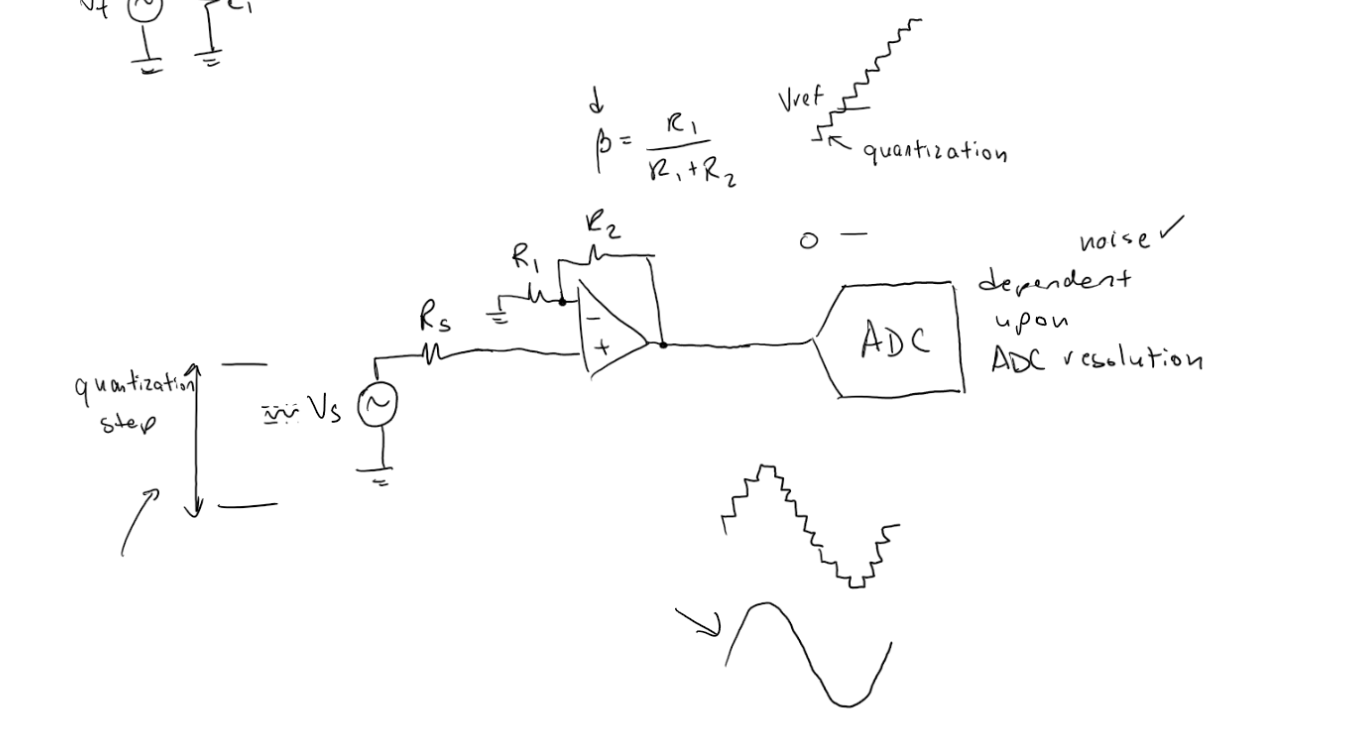

## Differential signaling

<center><img src="img/differential_signaling.png" width=1400 /></center>

 - Applications demanding high precision often employ differential signaling for robustness against certain types of noise/error
 - A differential signal is encoded as the difference between two voltages (or currents)
 - Differential operation can guard against errors that affect both halves of a differential signal equally
 - These types of errors are referred to as *common-mode* errors, since they are common to both

## Differential signals with common-mode noise

 - Let's take a look at an example of a pair differential signals with common-mode "noise"

In [8]:
# Define a sinusoidal "signal" with DC level
f = 1e3
w = f*2*np.pi
t = np.linspace(0,3e-3,num=300)
V_dd = 3.3
V_cm = V_dd/2
v_plus = V_cm + 1e-3*np.sin(w*t)
v_minus = V_cm - 1e-3*np.sin(w*t)

# Define a random noise source
mu = 0
sigma = 100e-6
v_noise = np.random.normal(mu, sigma, 300)

# Combine the two
vd_plus = v_plus + v_noise
vd_minus = v_minus + v_noise
v_diff = vd_plus - vd_minus


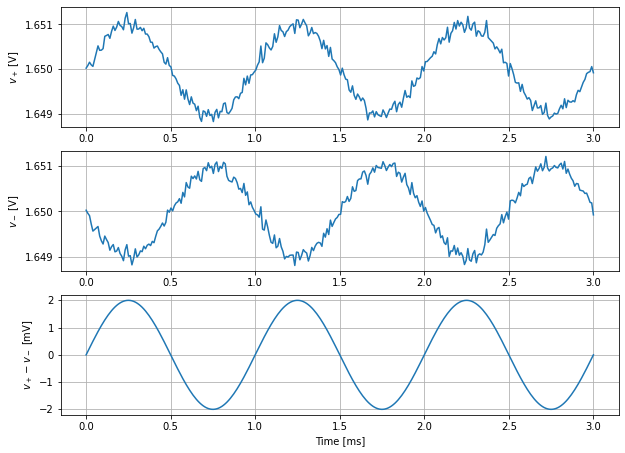

In [5]:
# Plot the complementary differential signals
# along with their difference
plot_xy3(1e3*t, vd_plus, vd_minus, 1e3*v_diff,
        'Time [ms]','$v_+$ [V]','$v_-$ [V]','$v_+ - v_-$ [mV]')

 - This is an example of "balanced" differential signals, which are complementary to each other
 - Differential signal magically removes the noise due to *common-mode rejection*
 - Keep in mind that many types of noise are *not* common-mode, and are thus not removed by differential signaling

## Unbalanced signals

 - Differential signals don't need to be balanced (i.e. complementary) to provide benefit
 - Here we take a look at two voltages with common-mode noise, only one of which is "moving"

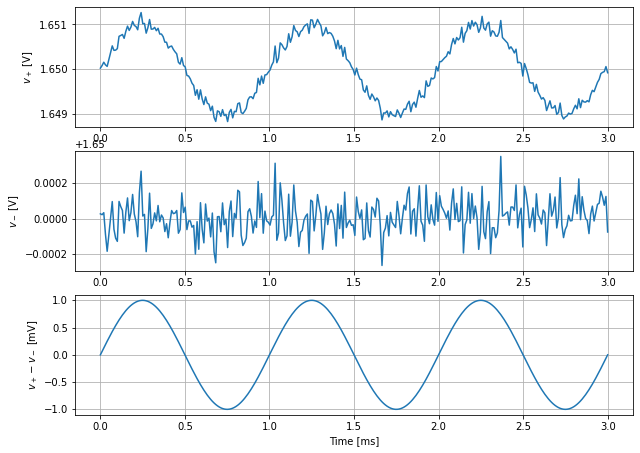

In [6]:
# Unbalanced differential signals
v_plus = V_cm + 1e-3*np.sin(w*t)
v_minus = V_cm - 1e-3*np.sin(w*t)
vd_plus = v_plus + v_noise 
vd_minus = V_cm + v_noise
v_diff = vd_plus - vd_minus

plot_xy3(1e3*t, vd_plus, vd_minus, 1e3*v_diff,
        'Time [ms]','$v_+$ [V]','$v_-$ [V]','$v_+ - v_-$ [mV]')

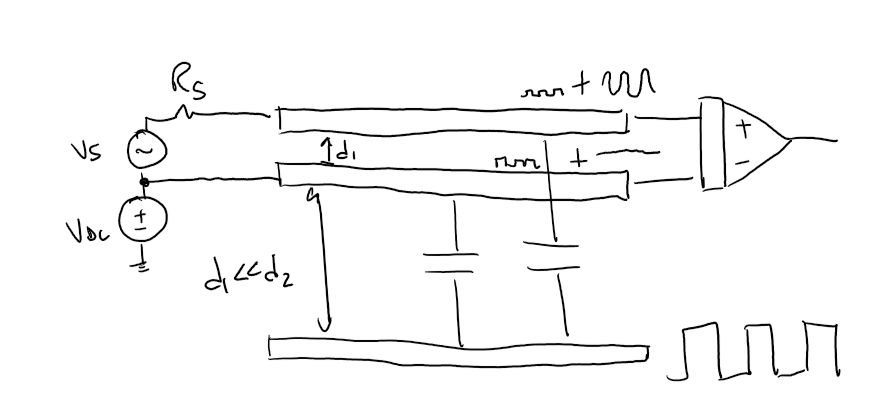

## Application: strain gages

<center><img src="img/strain_gage_amplification.png" width=600 /></center>

$$ V_{icm} = \dfrac{V_{DD}}{2} $$

$$ V_{in} = K \cdot \Delta R $$

 - A strain gage converts material strain into a change in resistance
 - A bridge circuit is often used to convert the resistance change ($\Delta R$) into a differential voltage
 - The change in voltage is based on the bridge "sensitivity" $K$
 - An amplifier with differential inputs amplifies the signal for further processing
 - This is an example of a "quarter bridge", where only one of the resistances responds to strain
 - The DC "common-mode" level is set by $V_{DD}$, which may be noisy

## Difference amplifier

<center><img src="img/difference_amplifier.png" width=600 /></center>

$$  V_{id} = V_{ip} - V_{im} $$

$$ R_3 = R_1 \:\:\:\: R_4 = R_2 $$

$$ V_o = \dfrac{R_2}{R_1} \cdot V_{id} $$

 - The difference amplifier essentially combines the inverting and non-inverting structures to process differential signals (like the output of a strain gage)
 - The *single-ended* output voltage is readily interfaced with other circuit blocks (e.g. filters or ADCs)
 - The effectiveness with which the circuit suppresses common-mode noise (referred to as *common-mode rejection*) depends on the matching between resistors $R_1$, $R_3$ and $R_2$, $R_4$
 - Like the inverting amplifier, the difference amplifier suffers from low input resistances, prohibiting its use with high-resistance sensors

## Difference amplifier analysis

<center><img src="img/diffamp_vip.png" width=600 /></center>

$$ v^+ = \dfrac{R_2}{R_1+R_2}\cdot V_{ip} $$

\begin{align}
V_o\;(V_{ip}) &= \left(1+\dfrac{R_2}{R_1} \right)\cdot v^+ \\
\\
&= \dfrac{R_1+R_2}{R_1}\cdot \dfrac{R_2}{R_1+R_2}\cdot V_{ip}\\
\\
&= \dfrac{R_2}{R_1}\cdot V_{ip}
\end{align}

 - For $V_{ip}$, the difference amplifier looks like a non-inverting stage with a resistor divider at the input

<center><img src="img/diffamp_vim.png" width=600 /></center>

$$ v^- = v^+ = 0V $$

$$ V_o \; (V_{im}) = -\dfrac{R_2}{R_1}\cdot V_{im} $$

 - For $V_{im}$, the difference amplifier looks like an inverting stage
 - Because we're using superposition, the presence of $R_1$ and $R_2$ at the non-inverting input ($v^+$) does not affect the gain for $V_{im}$

<center><img src="img/difference_amplifier2.png" width=600 /></center>

\begin{align}
V_o &= V_o\;(V_{ip}) + V_o\;(V_{im})\\
\\
&= \dfrac{R_2}{R_1}\cdot V_{ip} - \dfrac{R_2}{R_1}\cdot V_{im} \\
\\
&= \dfrac{R_2}{R_1}\cdot (V_{ip} - V_{im}) = \boxed{\dfrac{R_2}{R_1}\cdot V_{id}}
\end{align}

 - The difference amplifier converts a differential input voltage $V_{id}$ into a single-ended output voltage $V_o$, multiplied by a gain of $R_2/R_1$
 - This structure enables processing of differential signals, which provide immunity to certain types of noise (e.g. power supply noise), while providing a single-ended output that can be readily connected to other analog circuit blocks

## Difference amp reference voltage

<center><img src="img/diffamp_vref.png" width=600 /></center>

 - For single-ended supply applications, the *DC output common-mode* level is set by $V_{REF}$
 - If $V_{REF}$ is equal to the DC input common-mode, in the absence of an AC signal the current through $R_1$ and $R_2$ is zero and the output voltage is also $V_{REF}$
 - If the current required by $V_{REF}$ is small, it can be set by a voltage divider
 - However, many applications may require a more stable voltage, necessitating a low-impedance voltage for $V_{REF}$ (e.g. an additional opamp)

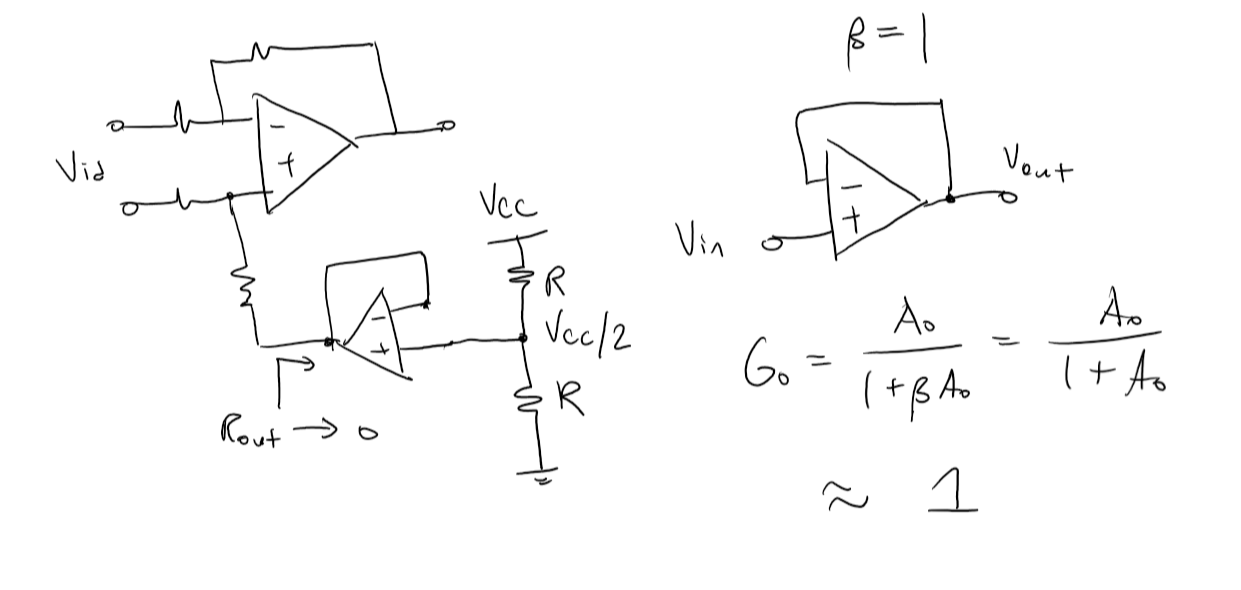

## Differential input impedance

 - The input impedance of a differential circuit is in general different for differential and common-mode signals
 - For the difference amplifier, the input impedance is similar to that of an inverting amplifier
 - For high closed-loop gain, $R_1$ must be much smaller than $R_2$
 - In addition, noise considerations may necessitate a small $R_1$
 - If interfacing with a sensor with high output resistance, the low input impedance of the difference amp may result in attenuation due to loading

<center><img src="img/diffamp_input_impedance.png" width=800 /></center>

$$ R_{in,diff} = \dfrac{v_t}{i_{-} - i_{+}} = \dfrac{G+1}{G}\cdot R_1 = \left(1+\dfrac{R_1}{R_2}\right)\cdot R_1$$

## Common-mode rejection

 - Even with a perfect opamp, component errors in the feedback network degrade precision
 - For differential applications, this affects both gain and common-mode rejection
 - For $G_{diff} = 100$ and $\epsilon = 1\%$,  we get a CMRR of ~68dB (the derviation of the expression for CMRR is fairly involved)
 - For higher CMRR, use resistors with tight tolerances (e.g. $\epsilon = 0.1\%$), or use a difference amplifier with integrated resistors

<center><img src="img/diffamp_CMRR.png" width=800 /></center>

$$ CMRR = \dfrac{G_{diff}}{G_{cm}} \approx \dfrac{G_{diff}+1}{4 \times \epsilon} $$

## Increasing input impedance

<center><img src="img/inamp_input.png" width=600 /></center>

- Combines the high input impedance of the non-inverting structure with differential operation
- The voltage across $R_G$ is 

    $$V_{ip} - V_{im} = V_{id}$$

- The current through the three resistors is 

    $$ I_{RG} = \dfrac{V_{id}}{R_G} $$
    
- The differential output voltage is thus

\begin{align}
V_{od} &= V_{id} + \left(\dfrac{R_{fp} + R_{fm}}{R_G} \right)V_{id} \\
\\
&= \left(1+\dfrac{2R_f}{R_G} \right) V_{id}
\end{align}


## Instrumentation amplifier

<center><img src="img/inamp.png" width=800 /></center>

 - A difference amplifier is cascaded with the first stage to convert its output to a single-ended voltage
 - The combination is typically referred to as an *instrumentation amplifier*
 - The second stage can increase the gain, or its gain can be set to 1 ($R_1 = R_2$)
 - The low input impedance of difference amplifier is easily driven by the two non-inverting stages
 - Due to the gain from the first stage, the CMRR is $G_{1}$ times higher than that of the difference amplifier alone, where $G_{1}$ is the differential gain of the input stage

## Instrumentation amplifier gain

<center><img src="img/inamp.png" width=800 /></center>

 - The gain of the first stage is given by
 
 $$ G_{1} = \left(1+\dfrac{2R_f}{R_G} \right) $$
 
 - The second stage is a difference amplifier, and its gain is thus
 
 $$ G_{2} = \dfrac{R_2}{R_1} $$
 
 - The gain of the instrumentation amplifier is their product:
 
 $$ \boxed{G = G_1 \cdot G_2 = \left(1+\dfrac{2R_f}{R_G} \right)\cdot \dfrac{R_2}{R_1}} $$
 
 - For optimal noise performance, $G_1$ should be as high as possible (more on this soon)

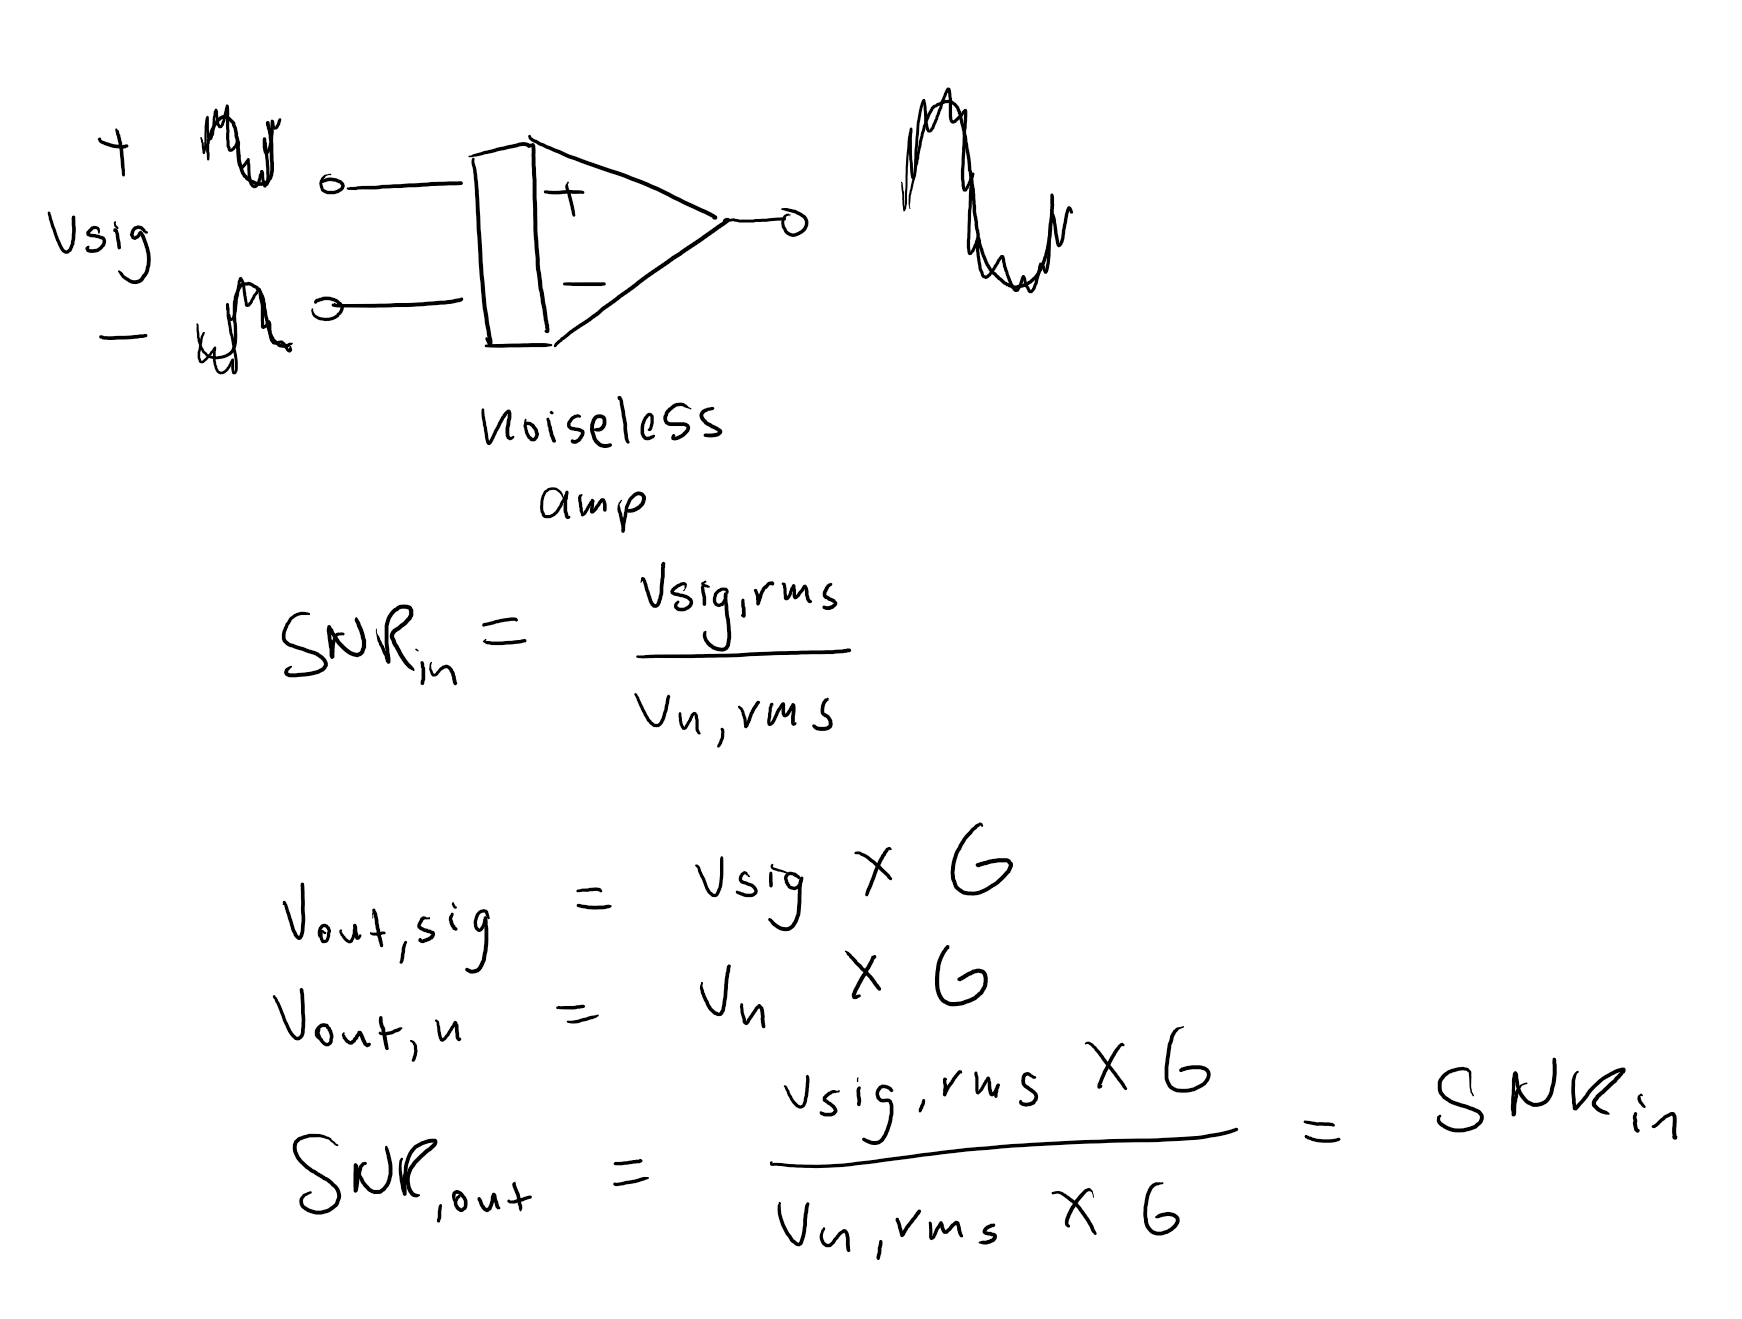